In [1]:
import torch
from torchtext.datasets import AG_NEWS

In [2]:
train_iter=iter(AG_NEWS(root='.data',split='train'))


In [4]:
#define vocabulary

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext import data
tokenizer=get_tokenizer('basic_english')
trainset=AG_NEWS(root='.data',split='train')

def yield_tokens(data_iter):
    for _,text in data_iter:
        yield tokenizer(text)

vocab=build_vocab_from_iterator(yield_tokens(trainset),specials=["<unk>"])

vocab.set_default_index(vocab['<unk>'])


text_pipeline=lambda x: vocab(tokenizer(x))
label_pipeline=lambda x: int(x)-1




207
43.280075


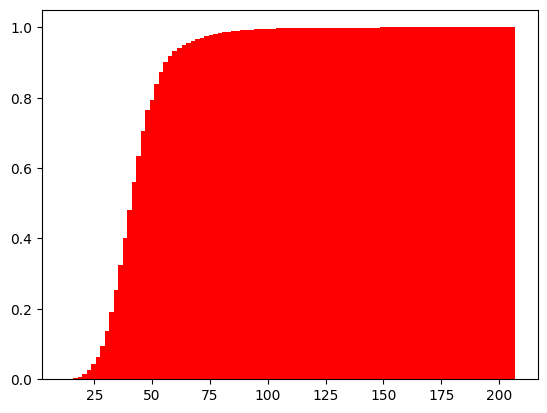

In [5]:
len(vocab)
import matplotlib.pyplot as plt
def show_data(data_set):
    text_len=[len(text_pipeline(x)) for _,x in data_set]
    print(max(text_len))
    print(sum(text_len)/len(text_len))
    plt.hist(text_len,bins=100,density=True,cumulative=True,color='red')
    plt.show()
show_data(trainset)